## Ejercicios con Python Tarea Clase 14
### Pablo Ángel Mendoza Aguirre

Consider the probability distribution whose probability density function is:
$$f(x) = \begin{cases}\frac{3}{2}x^{2}, &-1\leq x \leq 1\\ 0,& 1 < x < -1 \end{cases}$$
The problem is to perform a simulated experiment. with the help of varaince-reducing techniques, for estimating the mean of this distribution. To provide a standard of comparison, also derive the mean analytically.
For each of the following cases, use the same 10 uniform random numbers (obtained as instructed at the beginning od the Problems section) to generate random observations, and caalculate the resulting estimate of the mean.
> 1. Use the crude Monte Carlo Technique
> 2. Use stratified sampling with three strata $0 \leq F(x) \leq 0.6, 0.6 \leq F(x) \leq 0.9, 0.9 \leq F(x) \leq 1 $, with 3, 3, 4 observations, respectively.
> 3. Use the method of complementary random numbers.
> 4. Use the stratification method with B strats, as seen before and compare the results with points 1, 2 and 3, using 2, 4, 6, 10 strats. give a conclusion about it.

In [13]:
import numpy as np
import pandas as pd
import scipy.stats as st
from itertools import cycle
import matplotlib.pyplot as plt

Se tiene que $f(x) = \begin{cases}\frac{3}{2}x^{2}, &-1\leq x \leq 1\\ 0,& 1 < x < -1 \end{cases}$

El valor esperado de $f(x)$ esta dado por: 
$$E[x] = \int_{-\infty}^{-\infty} x f(x) dx = \int_{-1}^{1} x \frac{3}{2} x^{2} dx = \frac{3}{2} \int_{-1}^{1}  x^{3} dx = \frac{3}{2} \frac{x^{4}}{4} \Big|_{-1}^{1} = \frac{3}{8} [1 - 1] = 0$$

La función de distribución acumulada sería:
$$F(x) =  \int_{-\infty}^{x} f(x) dx = \int_{-1}^{x} \frac{3}{2} x^{2} dx = \frac{3}{2} \int_{-1}^{x} x^{2} dx = \frac{3}{2} \frac{x^{3}}{3} \Big|_{-1}^{x} = \frac{x^{3}}{2} \Big|_{-1}^{x} = \frac{x^{3}}{2} - \frac{-1}{2} = \frac{x^{3} + 1}{2} = -\frac{-x^{3} - 1}{2}$$

Método de la transformada inversa:
$$y = -\frac{- x^{3} - 1}{2} \longrightarrow -2 y = -x^{3} - 1 \longrightarrow -2 y + 1 = -x^{3} \longrightarrow -x = [- 2y + 1]^{\frac{1}{3}} \longrightarrow x = -[- 2y + 1]^{\frac{1}{3}}$$

Que está definida de la siguiente forma $-[- 2y + 1]^{\frac{1}{3}}$ si $y \leq 0.5$ y $[2y - 1]^{\frac{1}{3}}$ si $y \geq 0.5$

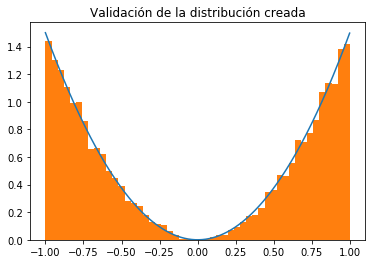

In [14]:
# Número de muestras a generar 
N2 = 10000 
# Función obtenida usando transformada inversa
xi = lambda u: -(-2*u+1)**(1/3) if u<.5 else (2*u-1)**(1/3)
f = lambda x: (3/2)*x**2 if x<=1 and x>=-1 else 0
# Validación de la función creada
x = np.arange(-1,1,0.001)
plt.plot(x,list(map(f,x)))
u = np.random.rand(N2)
randon_f = list(map(xi,u))
plt.hist(randon_f,50,density=True)
plt.title('Validación de la distribución creada')
plt.show()

1. Use the crude Monte Carlo Technique

In [23]:
np.random.seed(5555)
N = 10
# Usando montecarlo crudo
u1 = np.random.rand(N)
mean_mon_crudo = np.mean(list(map(xi,u1)))
print('Estimacíon de la media =',mean_mon_crudo)

Estimacíon de la media = 0.41484577982771526


2. Use stratified sampling with three strata $0 \leq F(x) \leq 0.6, 0.6 \leq F(x) \leq 0.9, 0.9 \leq F(x) \leq 1 $, with 3, 3, 4 observations, respectively.

In [24]:
# Usando muestreo estratificado 1
np.random.seed(5555)
r1 = np.random.uniform(0,0.6,3)
r2 = np.random.uniform(0.6,0.9,3)
r3 = np.random.uniform(0.9,1,4)
r  = [r1,r2,r3]
m  = range(len(r))  # Cantidad de estratos
w  = [1/2,1,4]
estrat1 = list(map(lambda r:np.array(list(map(xi,r))),r))
muestras = list(map(lambda wi,xi:xi/wi,w,estrat1))
print('Estimacíon de la media =',np.concatenate(muestras).mean())

Estimacíon de la media = -0.08915550594539501


3. Use the method of complementary random numbers.

In [25]:
u_comp = 1-u1
mean_aux = np.mean(list(map(xi,u_comp)))
mean_nume_compleme = (mean_mon_crudo+mean_aux)/2
print('Estimacíon de la media =',mean_nume_compleme)

Estimacíon de la media = 0.0


4. Use the stratification method with B strats, as seen before and compare the results with points 1, 2 and 3, using 2, 4, 6, 10 strats. give a comclusion about it.

In [26]:
def Muestreo_estratificado(N:'Número de estratos'):
    '''Función que regresa variables aleatorias generadas en N estratos'''
    B = N
    U2 = np.random.rand(B)
    i = np.arange(0,B)
    v = (U2+i)/B
    return v

In [27]:
# Método muestreo estratificado (B estratos)
np.random.seed(5555)
# Cantidad de estratos
B = [2,4,6,10]

# Creo la cantidad de muestras para casa estrato 
muestras = list(map(Muestreo_estratificado,B))

# Evalúo las muestras creadas y creo dos map por que la variable 'muestras' 
# es una lista de listas y necesito llamar la función xi término a 
# término, por que si le ingreso una lista tira error
aleatorios_f = list(map(lambda m_i:list(map(lambda m:xi(m),m_i)),muestras))

# Calculo la media para cada estrato
mean_estratos = list(map(lambda ei:np.mean(ei),aleatorios_f))

# imprimo los resultados obtenidos para cada estrato
impres = list(map(lambda bi,mean:print('Estimacíon de la media para %i estratos es %2.4f'
                         %(bi,mean)),B,mean_estratos))
# mean_estratos

Estimacíon de la media para 2 estratos es 0.0265
Estimacíon de la media para 4 estratos es -0.0520
Estimacíon de la media para 6 estratos es 0.0654
Estimacíon de la media para 10 estratos es 0.0139


Se concluye que el método estratificado hace que la media se aproxime más que el método crudo. Para esta función, no se observó una tendencia en la mejora de la media de acuerdo al aumento de los estratos, pero no es concluyente ya que el máximo de estratos fue de 10 en todos los casos. Finalmente se observó que el método que logró la media de forma exacta fue el de los números complementarios, ya que como la función es cuadrática y simetrica los complementos "neutralizan" a sus opuestos complementarios haciendo que la media sea de 0.0 exactamente.

## Ejemplo de aplicación:

Consider the probability distribution whose probability density function is:
$$f(x) = \begin{cases}\frac{1}{x^{2}}, &1\leq x \\ 0,& x < 1 \end{cases}$$
The problem is to perform a simulated experiment. with the help of varaince-reducing techniques, for estimating the mean of this distribution. To provide a standard of comparison, also derive the mean analytically.
For each of the following cases, use the same 10 uniform random numbers (obtained as instructed at the beginning od the Problems section) to generate random observations, and caalculate the resulting estimate of the mean.
> 1. Use the crude Monte Carlo Technique
> 2. Use stratified sampling with three strata $0 \leq F(x) \leq 0.6, 0.6 \leq F(x) \leq 0.9, 0.9 \leq F(x) \leq 1 $, with 3, 3, 4 observations, respectively.
> 3. Use the method of complementary random numbers.
> 4. Use the stratification method with B strats, as seen before and compare the results with points 1, 2 and 3, using 2, 4, 6, 10 strats. give a conclusion about it.

Se tiene que $f(x) = \begin{cases}\frac{1}{x^{2}}, &1\leq x \\ 0,& x < 1 \end{cases}$

El valor esperado de $f(x)$ esta dado por: 
$$E[x] = \int_{-\infty}^{-\infty} x f(x) dx = \int_{1}^{\infty} x \frac{1}{x^{2}}dx = \int_{1}^{\infty} \frac{1}{x} dx = \ln{x} \Big|_{1}^{\infty} = \infty - 0 = \infty $$

La función de distribución acumulada sería:
$$F(x) =  \int_{-\infty}^{x} f(x) dx = \int_{1}^{x} \frac{1}{x^{2}} dx = -\frac{1}{x} \Big|_{1}^{x} = \frac{-1}{x} + 1 $$

Método de la transformada inversa:
$$y = \frac{-1}{x} + 1 \longrightarrow 1 - y = \frac{1}{x} \longrightarrow x = \frac{1}{1 - y}$$

Que está definida de la siguiente forma  $0 < y < 1$ 

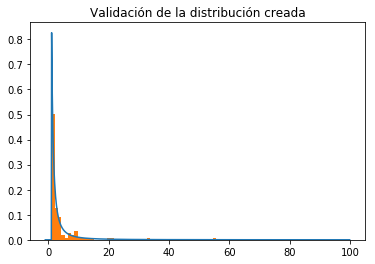

In [58]:
# Número de muestras a generar 
np.random.seed(1000)
N2 = 100
# Función obtenida usando transformada inversa
xi = lambda u: 1/(1-u) if u<1 else 0
f = lambda x: 1/(x**2) if x>=1 else 0
# Validación de la función creada
x = np.arange(-1,100,0.1)
plt.plot(x,list(map(f,x)))
u = np.random.rand(N2)
randon_f = list(map(xi,u))
plt.hist(randon_f,50,density=True)
plt.title('Validación de la distribución creada')
plt.show()

1. Use the crude Monte Carlo Technique

In [63]:
np.random.seed(1000)
N = 10
# Usando montecarlo crudo
u1 = np.random.rand(N)
mean_mon_crudo = np.mean(list(map(xi,u1)))
print('Estimacíon de la media =',mean_mon_crudo)

Estimacíon de la media = 4.549694690561948


2. Use stratified sampling with three strata $0 \leq F(x) \leq 0.6, 0.6 \leq F(x) \leq 0.9, 0.9 \leq F(x) \leq 1 $, with 3, 3, 4 observations, respectively.

In [64]:
# Usando muestreo estratificado 1
np.random.seed(1000)
r1 = np.random.uniform(0,0.6,3)
r2 = np.random.uniform(0.6,0.9,3)
r3 = np.random.uniform(0.9,1,4)
r  = [r1,r2,r3]
m  = range(len(r))  # Cantidad de estratos
w  = [1/2,1,4]
estrat1 = list(map(lambda r:np.array(list(map(xi,r))),r))
muestras = list(map(lambda wi,xi:xi/wi,w,estrat1))
print('Estimacíon de la media =',np.concatenate(muestras).mean())

Estimacíon de la media = 5.002450100423792


3. Use the method of complementary random numbers.

In [65]:
u_comp = 1-u1
mean_aux = np.mean(list(map(xi,u_comp)))
mean_nume_compleme = (mean_mon_crudo+mean_aux)/2
print('Estimacíon de la media =',mean_nume_compleme)

Estimacíon de la media = 4.863166289776404


4. Use the stratification method with B strats, as seen before and compare the results with points 1, 2 and 3, using 2, 4, 6, 10 strats. give a conclusion about it.

In [66]:
# Método muestreo estratificado (B estratos)
np.random.seed(1000)
# Cantidad de estratos
B = [2,4,6,10]

# Creo la cantidad de muestras para casa estrato 
muestras = list(map(Muestreo_estratificado,B))

# Evalúo las muestras creadas y creo dos map por que la variable 'muestras' 
# es una lista de listas y necesito llamar la función xi término a 
# término, por que si le ingreso una lista tira error
aleatorios_f = list(map(lambda m_i:list(map(lambda m:xi(m),m_i)),muestras))

# Calculo la media para cada estrato
mean_estratos = list(map(lambda ei:np.mean(ei),aleatorios_f))

# imprimo los resultados obtenidos para cada estrato
impres = list(map(lambda bi,mean:print('Estimacíon de la media para %i estratos es %2.4f'
                         %(bi,mean)),B,mean_estratos))
# mean_estratos

Estimacíon de la media para 2 estratos es 1.8727
Estimacíon de la media para 4 estratos es 2.8815
Estimacíon de la media para 6 estratos es 5.5547
Estimacíon de la media para 10 estratos es 57.8028


Se concluye que la media de $\infty$ no es aproximada por ninguno de los métodos anteriores ya que los decimales que dan las funciones aleatorias no son suficientes para que los valores de $f(x)$ se aproximen al infinito, sin embargo, se obserba que los valores de la media se alejan cada vez más del cero entre más se incrementan los estratos del método montecarlo. El método de números complementarios no tiene mucha aplicación para este caso ya que no es simétrica, en su lugar es más de tipo logarítmica.